<a href="https://colab.research.google.com/github/fauzularianto/BDPAL/blob/main/BDPAL_Kelompok_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/BDPAL/pollution_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Fitur Utama:

Temperature (°C): Suhu rata-rata di wilayah tersebut.

Humidity (%): Kelembapan relatif yang tercatat di wilayah tersebut.

PM2.5 (µg/m³): Tingkat partikel halus di udara.

PM10 (µg/m³): Tingkat partikel kasar di udara.

NO2 (ppb): Tingkat nitrogen dioksida di udara.

SO2 (ppb): Tingkat sulfur dioksida di udara.

CO (ppm): Tingkat karbon monoksida di udara.

Proximity to Industrial Areas (km): Jarak ke zona industri terdekat.

Population Density (orang/km²): Jumlah orang per kilometer persegi di wilayah tersebut.



---


Variabel Target: Tingkat Kualitas Udara

Good: Udara bersih dengan tingkat polusi rendah.

Moderate: Kualitas udara dapat diterima, tetapi terdapat sejumlah polutan.

Poor: Polusi terlihat jelas dan dapat menyebabkan masalah kesehatan bagi kelompok sensitif.

Hazardous: Udara sangat tercemar, menimbulkan risiko kesehatan serius bagi populasi.

In [36]:
df.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

In [37]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


#Data Preprocessing

In [39]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [40]:
df.duplicated().sum()

0

Cleaning Negative Value

In [41]:
negative_values = df[df.select_dtypes(include=['number']) < 0].count()
negative_values

Temperature                       0
Humidity                          0
PM2.5                             0
PM10                              1
NO2                               0
SO2                              30
CO                                0
Proximity_to_Industrial_Areas     0
Population_Density                0
Air Quality                       0
dtype: int64

In [42]:
numeric_cols = df.select_dtypes(include=['number']).columns
negative_data = df[df[numeric_cols].lt(0).any(axis=1)]
negative_data.head()

Temperature  Humidity  PM2.5  PM10   NO2  SO2    CO  \
22          25.6      58.3    0.4  -0.2  25.3  4.5  0.98   
57          29.0      83.5   31.5  44.4  27.0 -2.8  1.49   
166         29.3      78.5   14.8  19.2  29.3 -0.4  1.48   
205         25.9      64.2    1.5  10.3  23.6 -0.4  0.93   
351         24.3      44.2    9.5  12.5  18.8 -0.2  0.83   

     Proximity_to_Industrial_Areas  Population_Density Air Quality  
22                            10.0                 536        Good  
57                             5.7                 538    Moderate  
166                            8.0                 451    Moderate  
205                           11.5                 386        Good  
351                           10.6                 341        Good

In [43]:
for col in numeric_cols:
    df[col] = df[col].abs()

# Verification after cleaning
negative_values_after_cleaning = df[df.select_dtypes(include=['number']) < 0].count()
negative_values_after_cleaning

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [44]:
air_quality_order = ["Good", "Moderate", "Poor", "Hazardous"]
df['Air Quality'] = pd.Categorical(df['Air Quality'], categories=air_quality_order, ordered=True)

#EDA

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

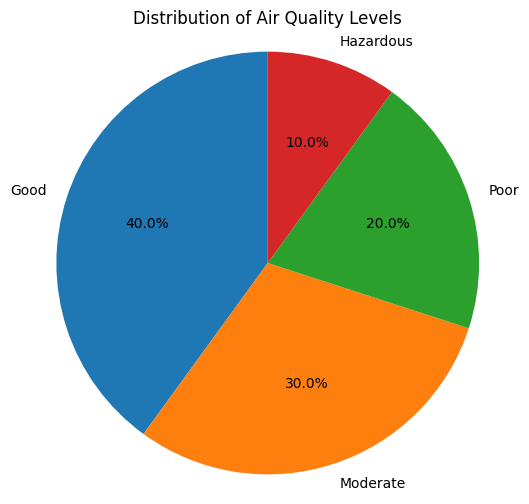

In [46]:
air_quality_counts = df['Air Quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Air Quality Levels')
plt.axis('equal')
plt.show()

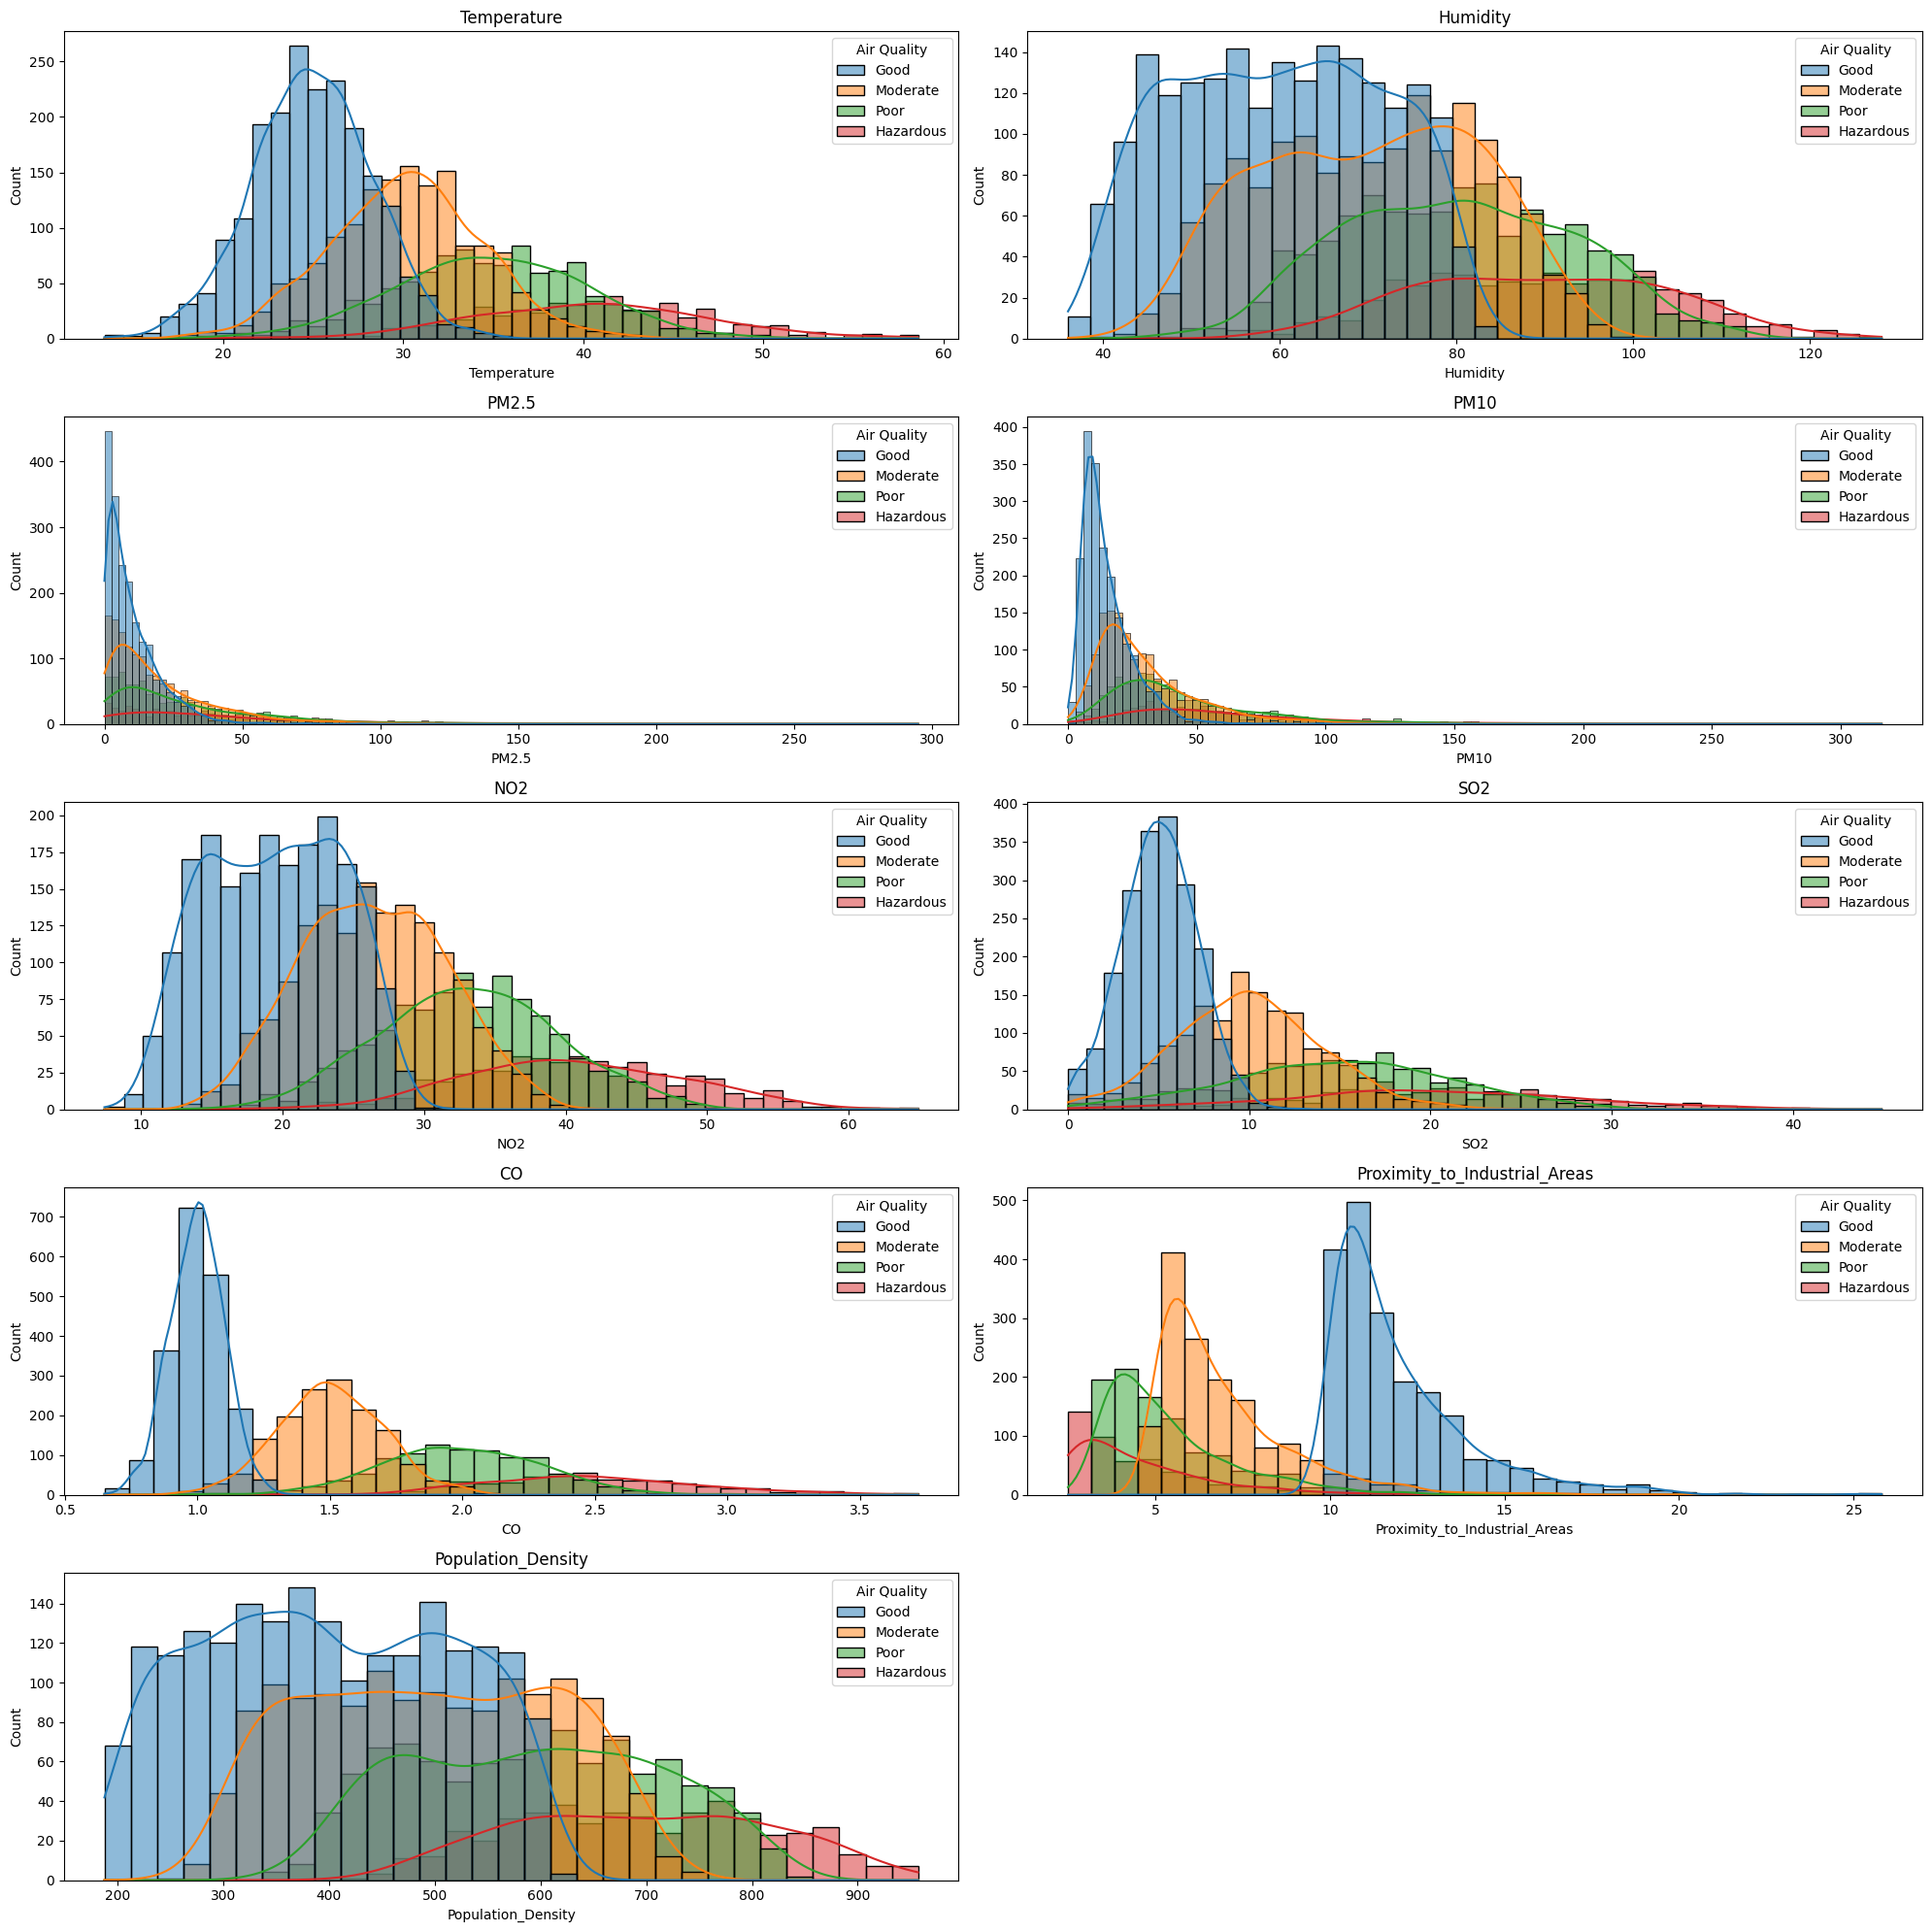

In [47]:
fig = plt.figure(figsize=(20, 20))  # Ukuran gambar tetap sama

# Mendapatkan jumlah kolom untuk diplot (semua kecuali 'Air Quality')
num_cols_to_plot = len(df.drop('Air Quality', axis=1).columns)

# Menghitung jumlah baris yang dibutuhkan (membulatkan ke atas)
num_rows = math.ceil(num_cols_to_plot / 2)  # 2 kolom yang diinginkan

# Melakukan iterasi dan plotting
for i, col in enumerate(df.drop('Air Quality', axis=1).columns):
    plt.subplot(num_rows, 2, i + 1)  # subplot dengan 2 kolom
    sns.histplot(x=df[col], hue=df['Air Quality'], kde=True)
    plt.title(col)

plt.tight_layout()  # Menyesuaikan jarak antar plot
plt.show()

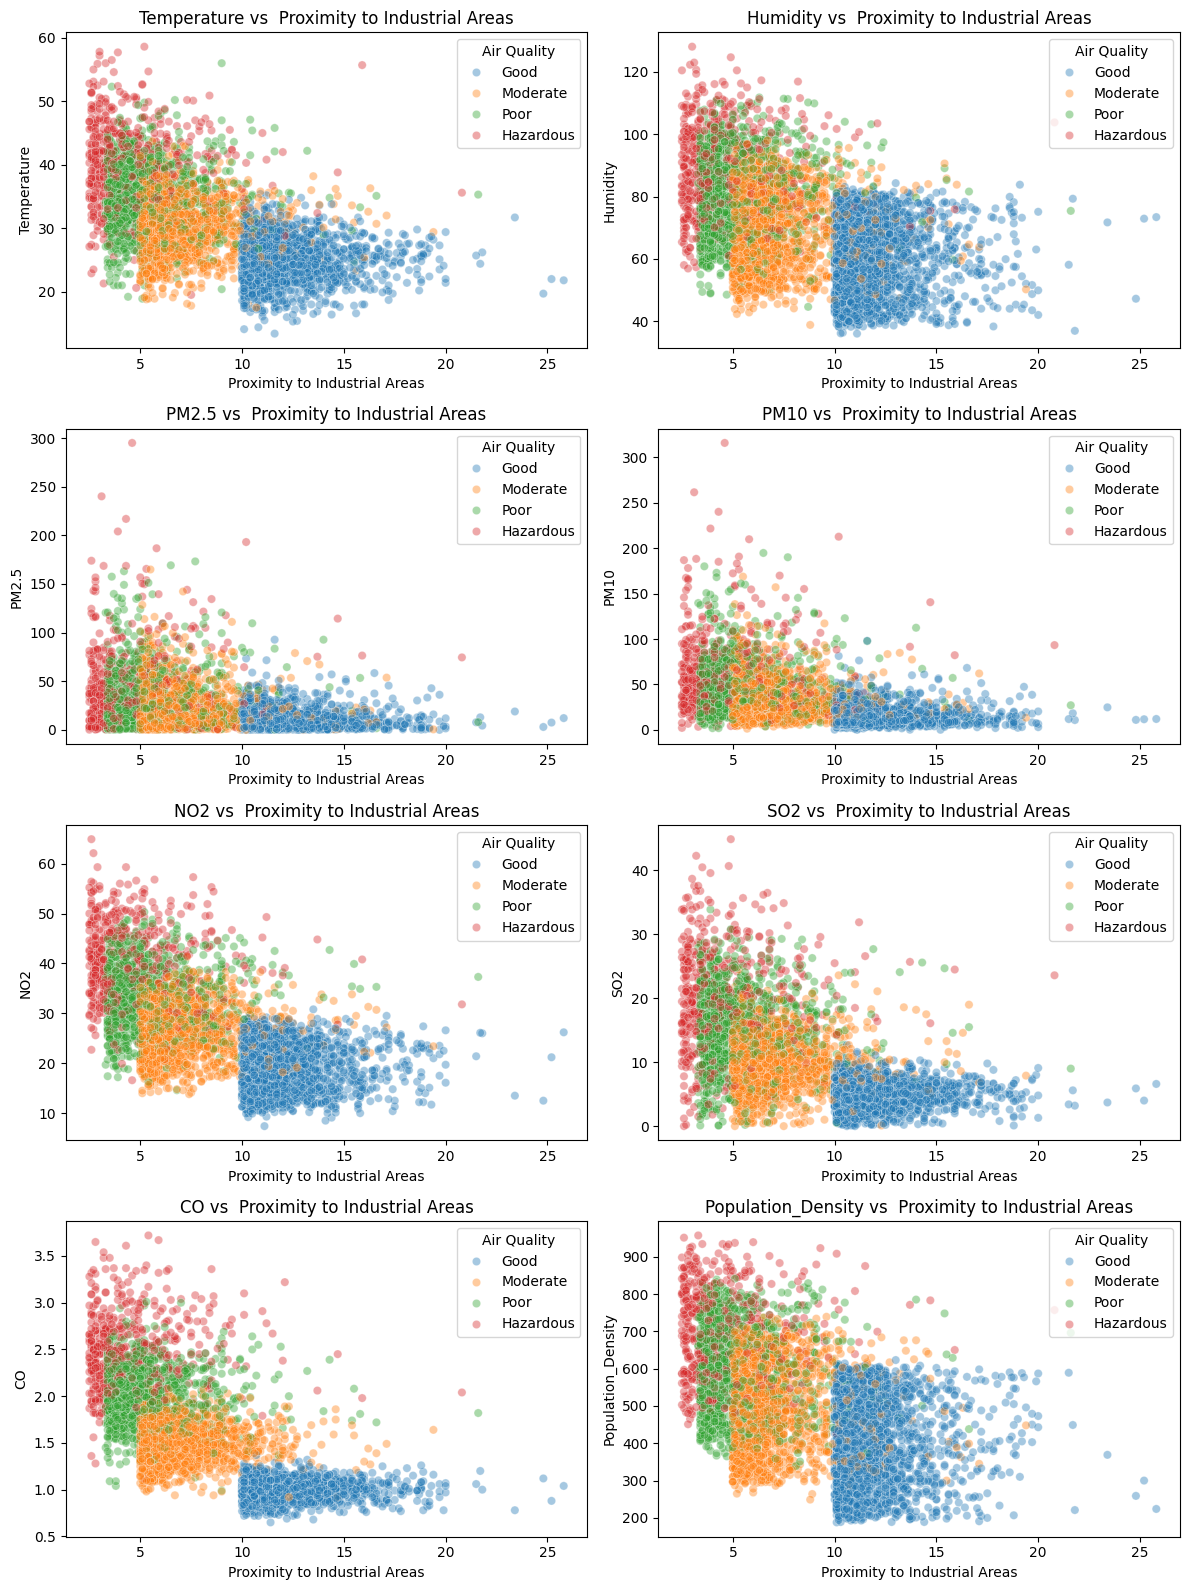

In [48]:
num_cols = 2
drop_plot = df.drop(['Air Quality', 'Proximity_to_Industrial_Areas'], axis=1).columns
num_plots = len(drop_plot)
num_rows = math.ceil(num_plots / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(drop_plot):
    sns.scatterplot(data=df, y=col, x='Proximity_to_Industrial_Areas', alpha=0.4, ax=axes[i], hue='Air Quality')
    axes[i].set_title(f'{col} vs  Proximity to Industrial Areas')
    axes[i].set_xlabel('Proximity to Industrial Areas')
    axes[i].set_ylabel(col)

for j in range(num_plots, num_rows * num_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

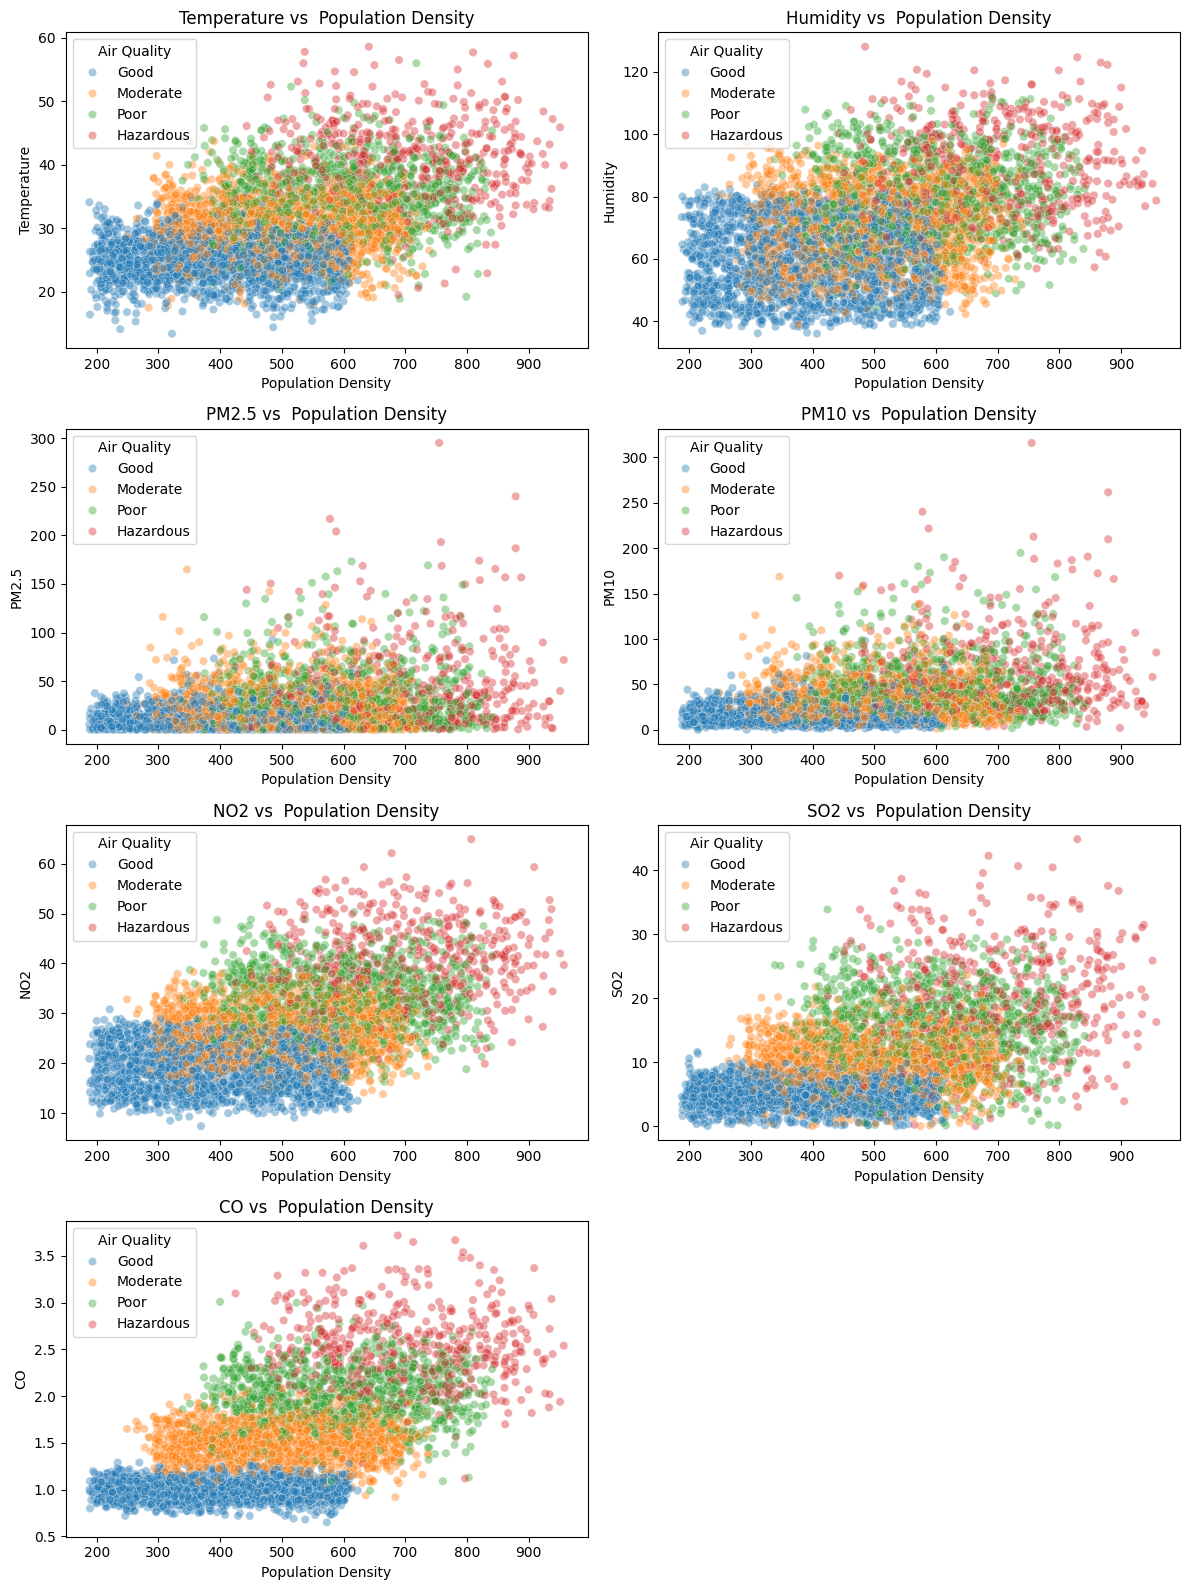

In [49]:
num_cols = 2
drop_plot = df.drop(['Air Quality', 'Proximity_to_Industrial_Areas', 'Population_Density'], axis=1).columns
num_plots = len(drop_plot)
num_rows = math.ceil(num_plots / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(drop_plot):
    sns.scatterplot(data=df, y=col, x='Population_Density', alpha=0.4, ax=axes[i], hue='Air Quality')
    axes[i].set_title(f'{col} vs  Population Density')
    axes[i].set_xlabel('Population Density')
    axes[i].set_ylabel(col)

for j in range(num_plots, num_rows * num_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#Data Processing

In [50]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

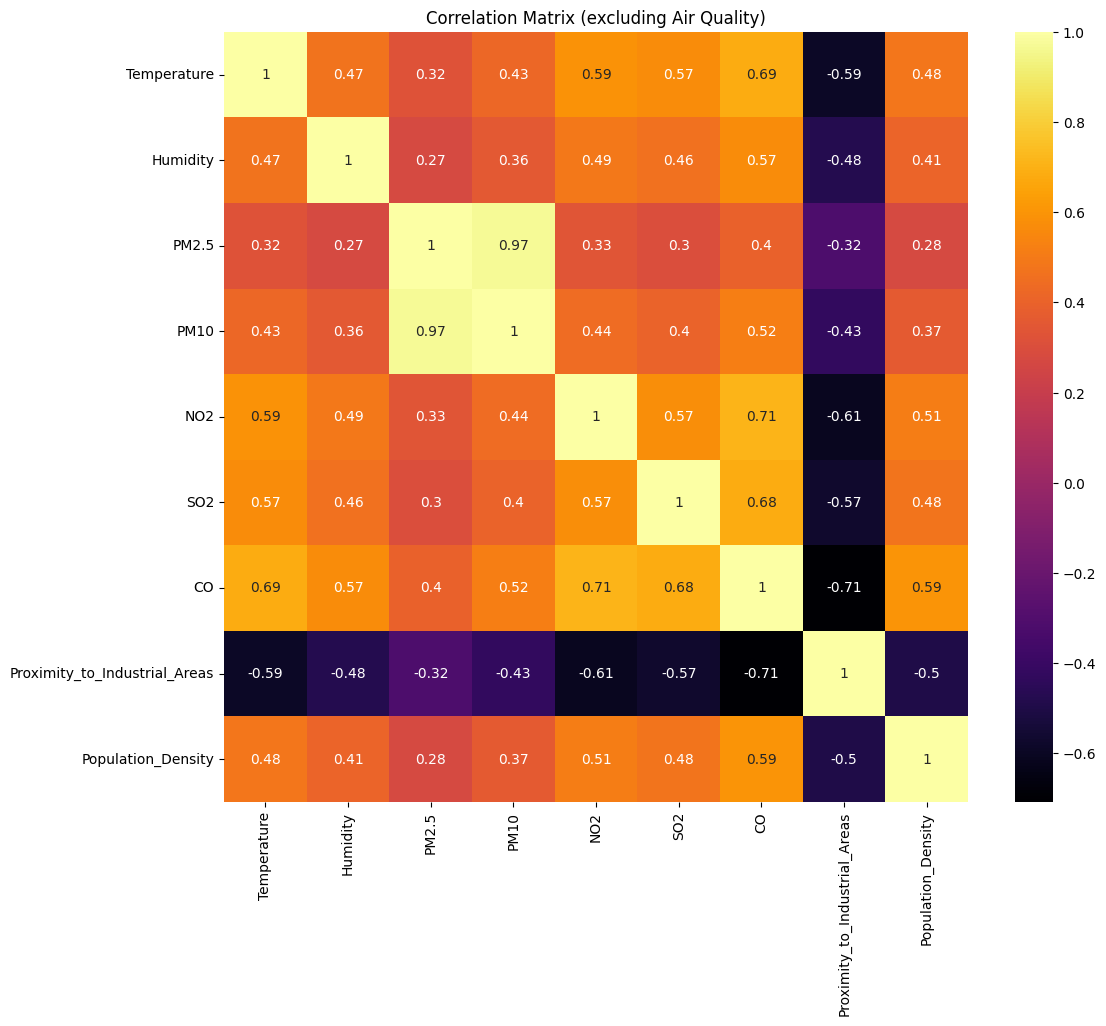

In [51]:
# Select all columns except the target column ('Air Quality')
correlation_columns = df.drop(columns=['Air Quality']).columns

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Heatmap for visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix (excluding Air Quality)')
plt.show()

In [52]:
df['PM_Avg'] = df[['PM2.5', 'PM10']].mean(axis=1)
df = df.drop(columns=['PM2.5', 'PM10'])
cols = df.columns.tolist()
humidity_index = cols.index('Humidity')
pm_avg_index = cols.index('PM_Avg')
cols.pop(pm_avg_index)
cols.insert(humidity_index + 1, 'PM_Avg')
df = df[cols]

In [53]:
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# 1. Log Transformation
df['PM_Avg_Log'] = np.log1p(df['PM_Avg'])  # log1p digunakan untuk menghindari log(0)
df.head()

Temperature  Humidity  PM_Avg   NO2   SO2    CO  \
0         29.8      59.1   11.55  18.9   9.2  1.72   
1         28.3      75.6    7.25  30.8   9.7  1.64   
2         23.1      74.7   30.25  24.4  12.6  1.63   
3         27.1      39.1    6.20  13.5   5.3  1.15   
4         26.5      70.7   11.45  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  PM_Avg_Log  
0                            6.3                 319    Moderate    2.529721  
1                            6.0                 611    Moderate    2.110213  
2                            5.2                 619    Moderate    3.442019  
3                           11.1                 551        Good    1.974081  
4                           12.7                 303        Good    2.521721

In [54]:
# prompt: replace PM_Avg value with Values of PM_Avg_Log

df['PM_Avg'] = df['PM_Avg_Log']
df = df.drop(columns=['PM_Avg_Log'])

In [55]:
df.head()

Temperature  Humidity    PM_Avg   NO2   SO2    CO  \
0         29.8      59.1  2.529721  18.9   9.2  1.72   
1         28.3      75.6  2.110213  30.8   9.7  1.64   
2         23.1      74.7  3.442019  24.4  12.6  1.63   
3         27.1      39.1  1.974081  13.5   5.3  1.15   
4         26.5      70.7  2.521721  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good

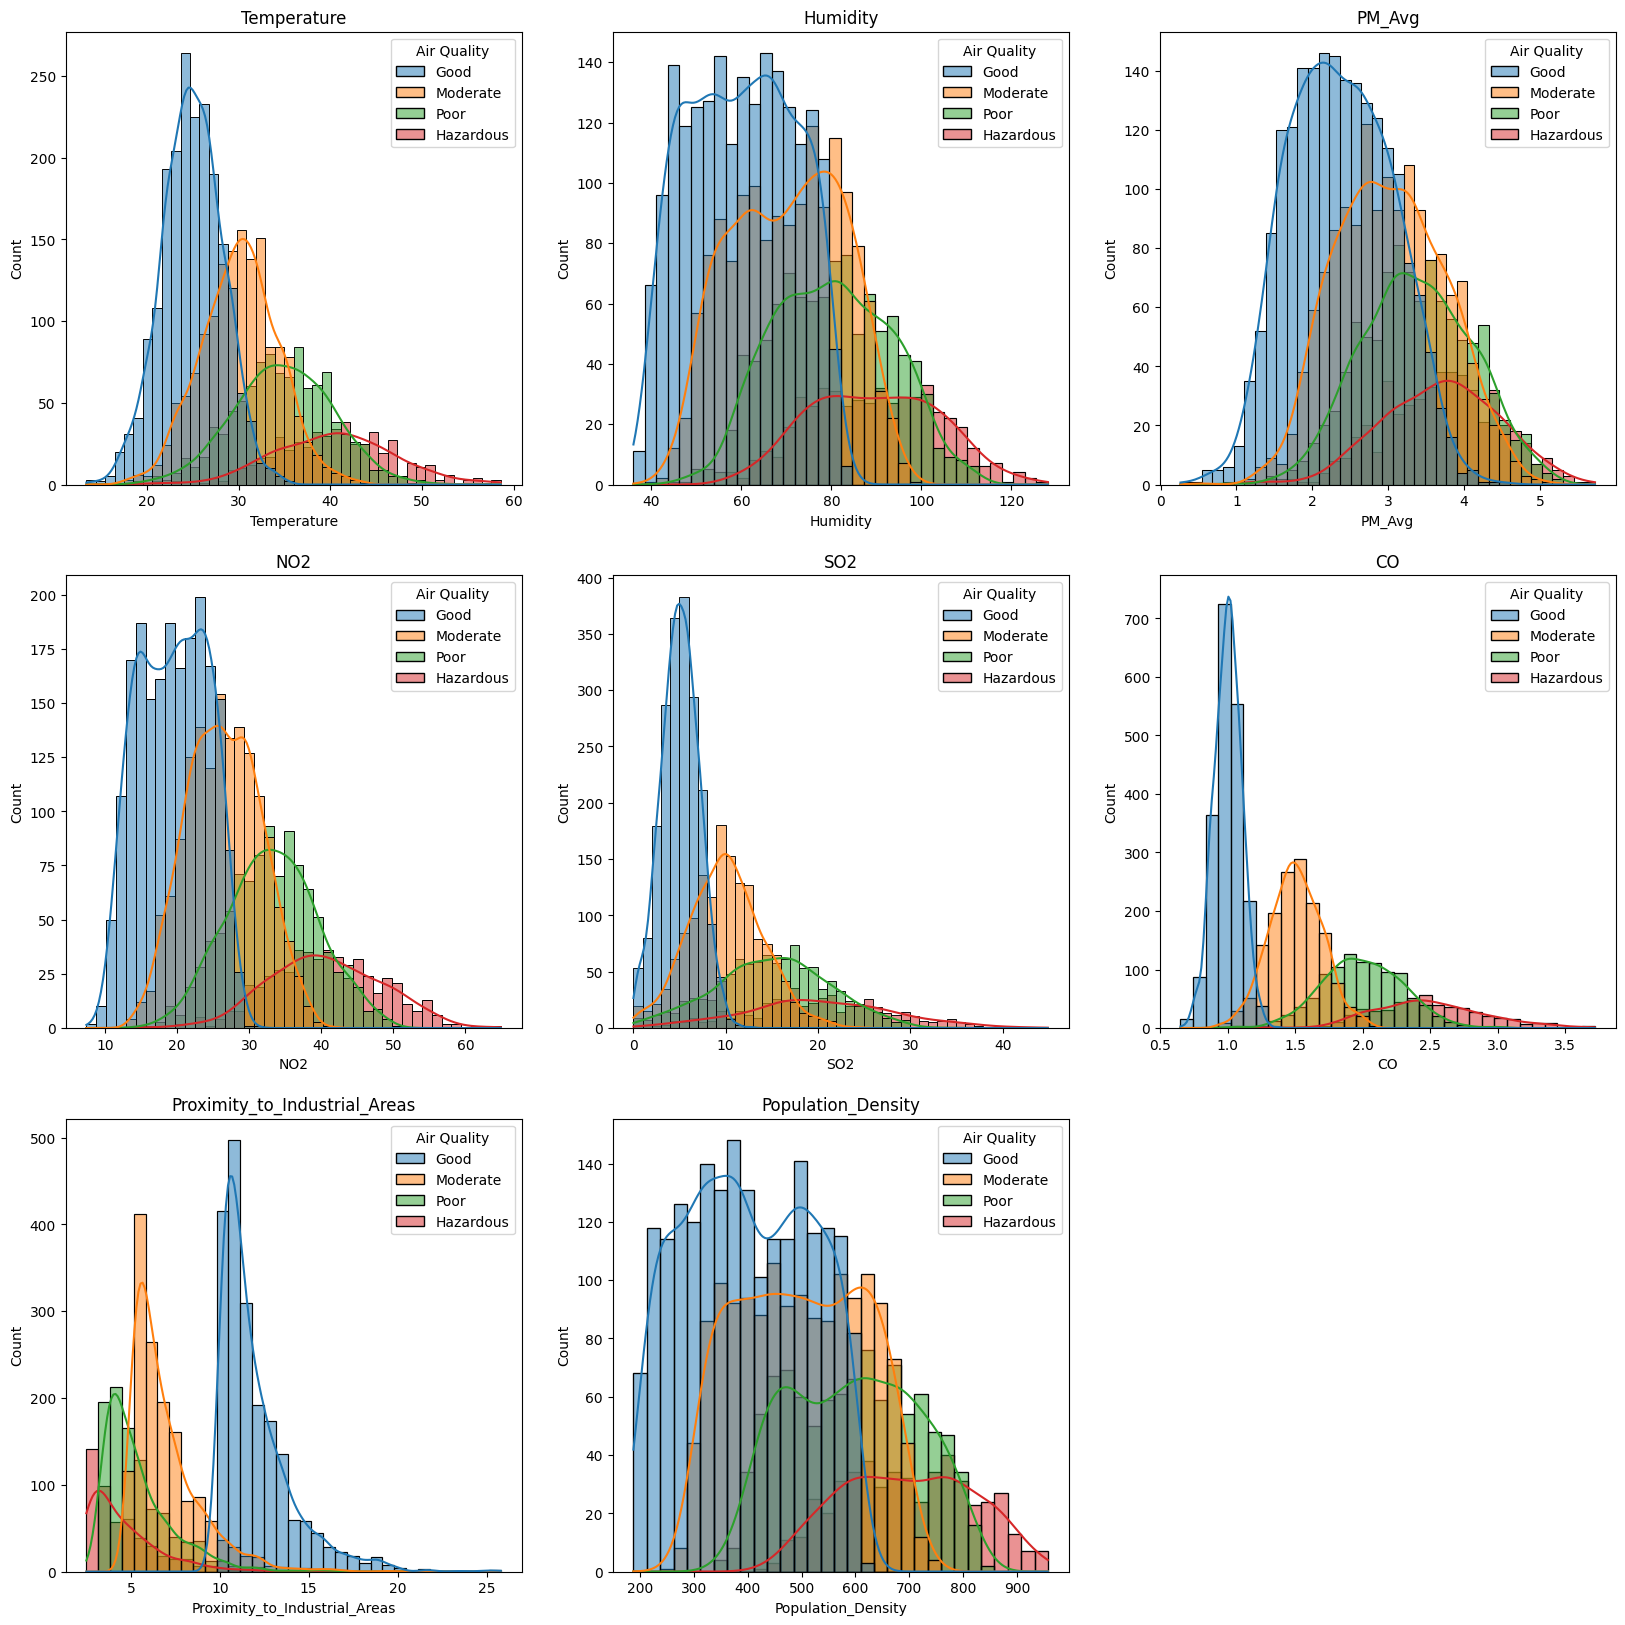

In [56]:
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(df.drop('Air Quality', axis=1).columns):
  plt.subplot(3,3,i+1)
  sns.histplot(x = df[col], hue=df['Air Quality'], kde=True)
  plt.title(col)

#ML Modeling

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

Over Sampling

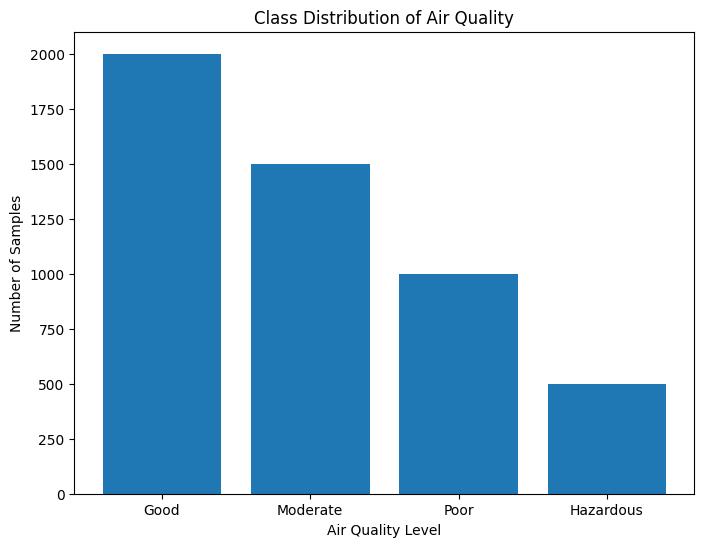

Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: count, dtype: float64

In [58]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Air Quality' is your target variable
air_quality_counts = df['Air Quality'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(air_quality_counts.index, air_quality_counts.values)
plt.xlabel("Air Quality Level")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Air Quality")
plt.show()

# Calculate and print the percentage of each class
class_percentages = (air_quality_counts / len(df)) * 100
class_percentages

oversampling menggunakan SMOTE

Air Quality
Good         2000
Moderate     2000
Poor         2000
Hazardous    2000
Name: count, dtype: int64


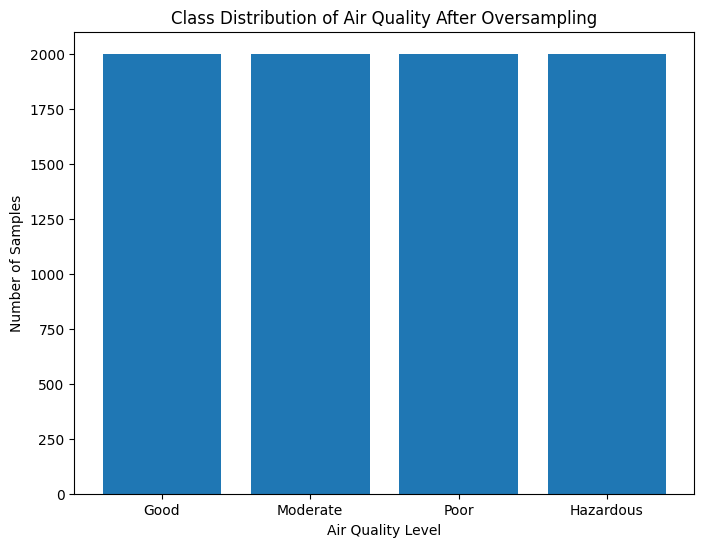

In [59]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Separate features (X) and target variable (y)
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)  # You can adjust the random_state
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Air Quality'] = y_resampled

# Check the class distribution after oversampling
air_quality_counts_resampled = df_resampled['Air Quality'].value_counts()
print(air_quality_counts_resampled)

plt.figure(figsize=(8, 6))
plt.bar(air_quality_counts_resampled.index, air_quality_counts_resampled.values)
plt.xlabel("Air Quality Level")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Air Quality After Oversampling")
plt.show()

In [60]:
air_quality_mapping = {"Good": 0, "Moderate": 1, "Poor": 2, "Hazardous": 3}
df_resampled['Air Quality'] = df_resampled['Air Quality'].map(air_quality_mapping)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Temperature                    8000 non-null   float64 
 1   Humidity                       8000 non-null   float64 
 2   PM_Avg                         8000 non-null   float64 
 3   NO2                            8000 non-null   float64 
 4   SO2                            8000 non-null   float64 
 5   CO                             8000 non-null   float64 
 6   Proximity_to_Industrial_Areas  8000 non-null   float64 
 7   Population_Density             8000 non-null   int64   
 8   Air Quality                    8000 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 508.1 KB


In [61]:
df_resampled.head()

Temperature  Humidity    PM_Avg   NO2   SO2    CO  \
0         29.8      59.1  2.529721  18.9   9.2  1.72   
1         28.3      75.6  2.110213  30.8   9.7  1.64   
2         23.1      74.7  3.442019  24.4  12.6  1.63   
3         27.1      39.1  1.974081  13.5   5.3  1.15   
4         26.5      70.7  2.521721  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319           1  
1                            6.0                 611           1  
2                            5.2                 619           1  
3                           11.1                 551           0  
4                           12.7                 303           0

In [62]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [63]:
x = df_resampled.drop('Air Quality', axis=1)
y = df_resampled['Air Quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5600, 8) (5600,) (2400, 8) (2400,)



Random Forest
Accuracy: 0.9704166666666667
Precision: 0.9708253118566296
Recall: 0.9704166666666667
F1-score: 0.9705320954187886

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.97      0.97      0.97       625
           2       0.93      0.96      0.94       577
           3       0.98      0.96      0.97       594

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



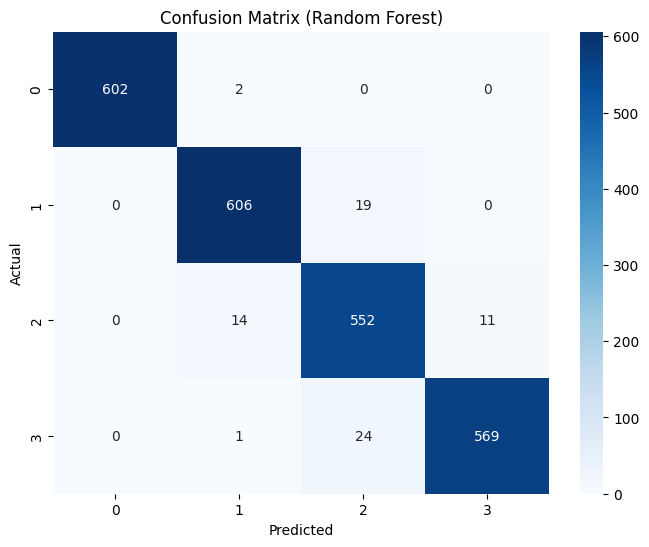


Gradient Boosting
Accuracy: 0.96
Precision: 0.960571459177905
Recall: 0.96
F1-score: 0.960130417793977

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.97      0.97      0.97       625
           2       0.90      0.94      0.92       577
           3       0.97      0.93      0.95       594

    accuracy                           0.96      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.96      0.96      0.96      2400



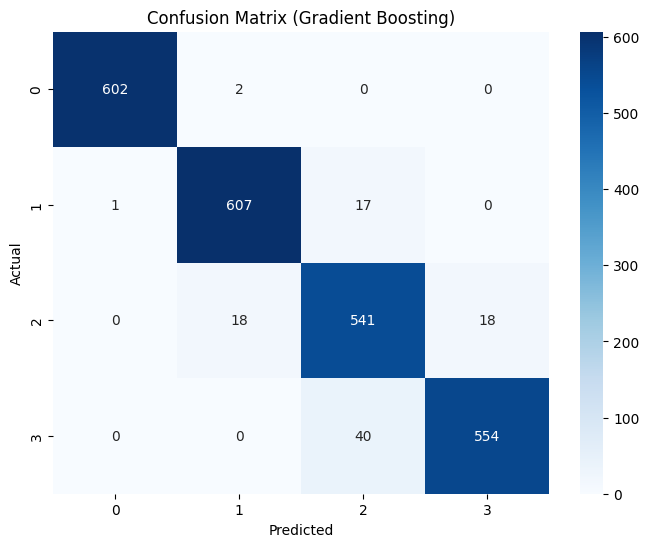


Naive Bayes
Accuracy: 0.9391666666666667
Precision: 0.9397710990425321
Recall: 0.9391666666666667
F1-score: 0.939330552776007

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.96      0.96      0.96       625
           2       0.86      0.89      0.88       577
           3       0.94      0.90      0.92       594

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



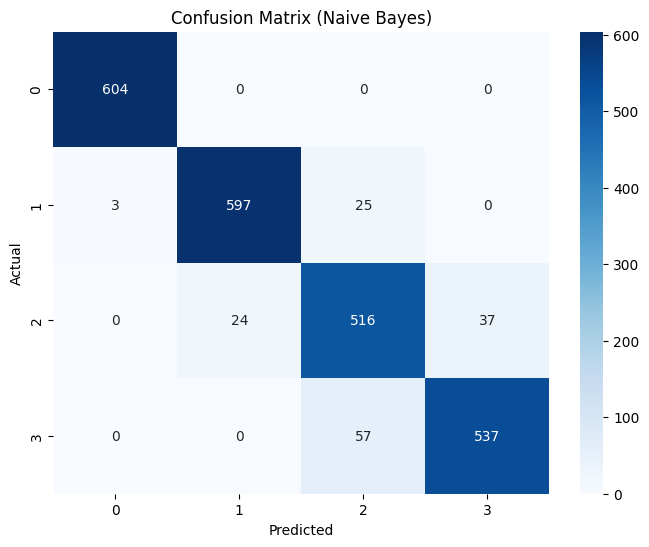


Decision Tree
Accuracy: 0.9245833333333333
Precision: 0.9246736680039576
Recall: 0.9245833333333333
F1-score: 0.9246008337873983

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.94      0.95      0.95       625
           2       0.84      0.85      0.85       577
           3       0.91      0.90      0.90       594

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



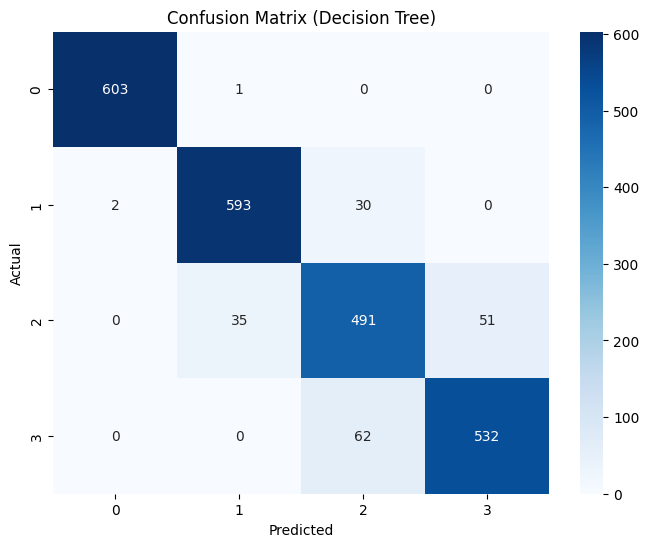

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
x = df_resampled.drop('Air Quality', axis=1)
y = df_resampled['Air Quality']

# Define models to evaluate
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Function to evaluate a model
def evaluate_model(name, model):
    print(f"\n{name}")
    print("=" * len(name))

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({name})")
    plt.show()

# Iterate through models
for name, model in models.items():
    evaluate_model(name, model)

# Hyperparameter Tuning

**Random Forest Classifier**


Random Forest hyperparameter tuning took 486.76 seconds

Evaluation for Random Forest:
  Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
  Accuracy: 0.9725
  Precision: 0.9727
  Recall: 0.9725
  F1-score: 0.9726
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.97      0.97      0.97       625
           2       0.94      0.95      0.95       577
           3       0.98      0.96      0.97       594

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



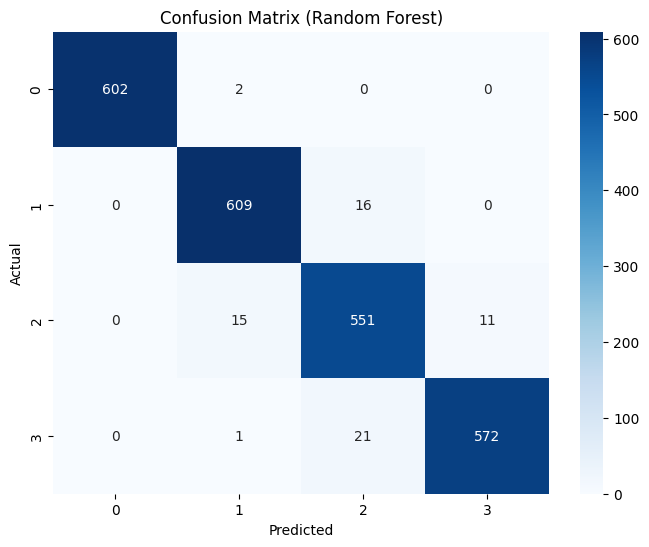

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

# Define the hyperparameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 75, 100, 125, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV for Random Forest
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=50,
    cv=10,
    n_jobs=-1,
    random_state=42
)

# Start the hyperparameter search
start_time = time.time()
rf_search.fit(x_train, y_train)
elapsed_time = time.time() - start_time

print(f"\nRandom Forest hyperparameter tuning took {elapsed_time:.2f} seconds")

# Get the best hyperparameters and evaluate the model
best_rf_params = rf_search.best_params_
best_rf_model = rf_search.best_estimator_

y_pred_rf = best_rf_model.predict(x_test)

# Print evaluation metrics for Random Forest
print("\nEvaluation for Random Forest:")
print(f"  Best Parameters: {best_rf_params}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"  Classification Report:\n{classification_report(y_test, y_pred_rf)}")

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

**Gradient Boosting Classifier**


Gradient Boosting hyperparameter tuning took 467.60 seconds

Evaluation for Gradient Boosting:
  Best Parameters: {'subsample': 0.9, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
  Accuracy: 0.9692
  Precision: 0.9697
  Recall: 0.9692
  F1-score: 0.9693
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.97      0.97      0.97       625
           2       0.92      0.96      0.94       577
           3       0.98      0.96      0.97       594

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



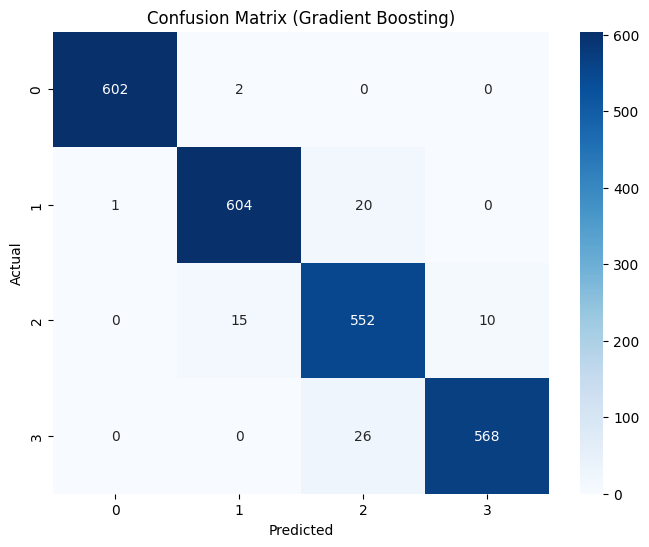

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

# Define the hyperparameter grid for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.2, 0.5, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV for Gradient Boosting
gb_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_params,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Start the hyperparameter search
start_time = time.time()
gb_search.fit(x_train, y_train)
elapsed_time = time.time() - start_time

print(f"\nGradient Boosting hyperparameter tuning took {elapsed_time:.2f} seconds")

# Get the best hyperparameters and evaluate the model
best_gb_params = gb_search.best_params_
best_gb_model = gb_search.best_estimator_

y_pred_gb = best_gb_model.predict(x_test)

# Print evaluation metrics for Gradient Boosting
print("\nEvaluation for Gradient Boosting:")
print(f"  Best Parameters: {best_gb_params}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"  Classification Report:\n{classification_report(y_test, y_pred_gb)}")

# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Gradient Boosting)")
plt.show()